In [1]:
%matplotlib inline

In [2]:
from rayoptics.environment import *

In [3]:
opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

### Define first order aperture and field for system

In [4]:
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 20.0])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)

### Define interface and gap data for the sequential model

In [5]:
opm.radius_mode = True

sm.gaps[0].thi=1e10

sm.add_surface([23.713, 4.831, 'N-LAK9', 'Schott'])
sm.add_surface([7331.288, 5.86])
sm.add_surface([-24.456, .975, 'N-SF5', 'Schott'])
sm.set_stop()
sm.add_surface([21.896, 4.822])
sm.add_surface([86.759, 3.127, 'N-LAK9', 'Schott'])
sm.add_surface([-20.4942, 41.2365])


### Update the model

In [6]:
opm.update_model()

## Draw a lens picture

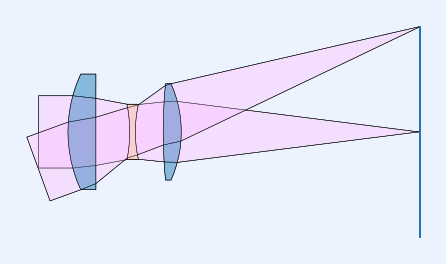

In [7]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm).plot()

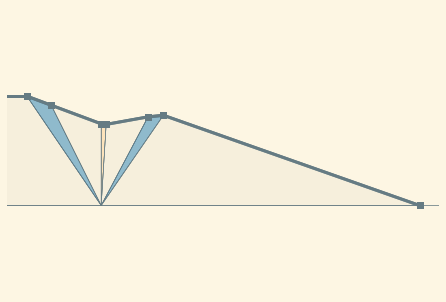

In [8]:
yybar_plt = plt.figure(FigureClass=InteractiveDiagram, opt_model=opm, dgm_type='ht', refresh_gui=None).plot()

## Plot the transverse ray aberrations

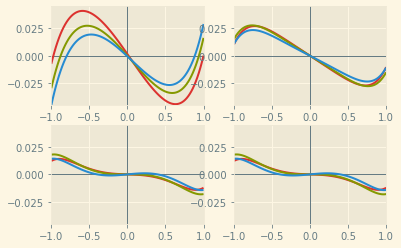

In [9]:
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same).plot()

## Plot the wavefront aberration

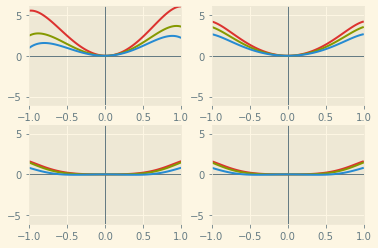

In [10]:
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same).plot()

## List the optical specifications

In [11]:
osp.parax_data.fod.list_first_order_data()

efl                  50
ffl               -37.1
pp1                12.9
bfl               41.24
ppk               8.763
f/#                   4
m             2.298e-05
red              -2e+08
obj_dist          1e+10
obj_ang              20
enp_dist          11.68
enp_radius         6.25
na obj         6.25e-10
n obj                 1
img_dist          41.24
img_ht             18.2
exp_dist         -10.01
exp_radius        6.406
na img           -0.124
n img                 1
optical invariant        2.275


## List the paraxial model

In [12]:
pm.list_lens()

       ax_ray_ht    ax_ray_slp
 0:            0      6.25e-10
 1:         6.25     -0.182126
 2:       5.7297     -0.181586
 3:       4.6656    -0.0532508
 4:       4.6346     0.0891357
 5:       5.0644        0.0488
 6:       5.1546     -0.124998
 7:   0.00014365     -0.124998

       pr_ray_ht    pr_ray_slp
 0:  -3.6397e+09       0.36397
 1:      -4.2509      0.487842
 2:      -2.8572      0.487573
 3:   3.5341e-07      0.487573
 4:       0.2842      0.496304
 5:       2.6774       0.47498
 6:       3.5557      0.355092
 7:       18.198      0.355092

            power           tau        index    type
 0:             0         1e+10      1.00000    transmit
 1:    0.02914022        2.8569      1.69100    transmit
 2: -9.425384e-05          5.86      1.00000    transmit
 3:   -0.02750683       0.58289      1.67271    transmit
 4:   -0.03072283         4.822      1.00000    transmit
 5:   0.007964615        1.8492      1.69100    transmit
 6:    0.03371696        41.236      1.00000 

## Third Order Seidel aberrations

### Computation and tabular display

In [13]:
to_pkg = compute_third_order(opm)
to_pkg

,S-I,S-II,S-III,S-IV,S-V
1,0.027654,0.019379,0.013581,0.089174,0.072010
2,0.022082,-0.059501,0.160327,-0.000288,-0.431229
3,-0.105156,0.137692,-0.180295,-0.085097,0.347506
4,-0.045358,-0.076796,-0.130024,-0.095046,-0.381069
5,0.007942,0.028382,0.101431,0.024373,0.449596
6,0.103810,-0.050068,0.024148,0.103180,-0.061411
sum,0.010973,-0.000912,-0.010832,0.036297,-0.004597


### Bar chart for surface by surface third order aberrations

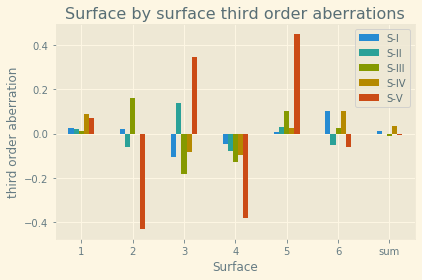

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel('Surface')
ax.set_ylabel('third order aberration')
ax.set_title('Surface by surface third order aberrations')
to_pkg.plot.bar(ax=ax, rot=0)
ax.grid(True)
fig.tight_layout()

### convert aberration sums to transverse measure

In [15]:
ax_ray, pr_ray, fod = osp.parax_data
n_last = pm.sys[-1][mc.indx]
u_last = ax_ray[-1][mc.slp]
to.seidel_to_transverse_aberration(to_pkg.loc['sum',:], n_last, u_last)

TSA   -0.043893
TCO    0.010944
TAS   -0.015198
SAS   -0.101860
PTB   -0.145190
DST    0.018387
dtype: float64

### convert sums to wavefront measure

In [16]:
central_wv = opm.nm_to_sys_units(sm.central_wavelength())
to.seidel_to_wavefront(to_pkg.loc['sum',:], central_wv).T

W040     2.334457
W131    -0.776108
W222    -9.218154
W220    10.834770
W311    -3.911650
dtype: float64

### compute Petzval, sagittal and tangential field curvature

In [17]:
to.seidel_to_field_curv(to_pkg.loc['sum',:], n_last, fod.opt_inv)

TCV    0.000734
SCV    0.004921
PCV    0.007014
dtype: float64

## Save the model

In [18]:
opm.save_model('Sasian Triplet')

## Miscellaneous

In [19]:
sm.list_surfaces()

0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=transmit)
1 Surface(profile=Spherical(c=0.042170961076202926), interact_mode=transmit)
2 Surface(profile=Spherical(c=0.00013640168003221264), interact_mode=transmit)
3 Surface(profile=Spherical(c=-0.04088976120379457), interact_mode=transmit)
4 Surface(profile=Spherical(c=0.04567044208987943), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.011526181721781025), interact_mode=transmit)
6 Surface(profile=Spherical(c=-0.04879429301948844), interact_mode=transmit)
7 Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode=transmit)


In [20]:
yybar_plt = plt.figure(FigureClass=ParaxialDesignFigure, opt_model=opm, dgm_type='ht', refresh_gui=None)
def refresh_yybar():
    opm.update_model()
    yybar_plt.update_data()
    yybar_plt.plot()

yybar_plt.refresh_gui=refresh_yybar

<ParaxialDesignFigure size 432x288 with 0 Axes>

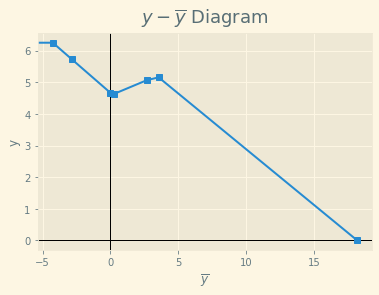

In [21]:
refresh_yybar()
yybar_plt.plot()

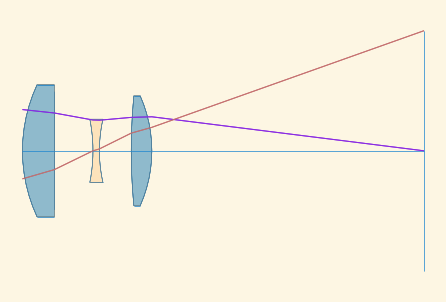

In [22]:
live_layout = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, refresh_gui=None).plot()